In [1]:
import pandas as pd
import os

In [2]:
print(os.getcwd())
print(os.listdir(os.getcwd()))

/home/kde/workShare/projet_covid_19/Livrable
['p.html', 'styling_selections.html', 'analyse_deces_guerison_infection.ipynb', 'df_HTML.html', 'Ressources_Data', 'Dataset_ServiceRea_Geolocalisation.ipynb', 'DataSet_ML_Patient_Profile_world.ipynb', '.ipynb_checkpoints', 'Fichiers_PowerBI', 'Dataset_ServiceREA.ipynb', 'webscraping_googleNews_covid.ipynb']


In [3]:
#path = '/home/kde/workShare/projet_covid_19/Livrable/Ressources_Data/Nombre_de_cas_par_Departement.csv'
#df_numPersMedical = pd.read_csv(path, sep = ',', header=0)

path3 = 'https://www.data.gouv.fr/fr/datasets/r/63352e38-d353-4b54-bfd1-f1b3ee1cabd7'
df_numPersMedical3 = pd.read_csv(path3, sep = ';', header=0, encoding='utf-8')

path2 = '/home/kde/workShare/projet_covid_19/Livrable/Ressources_Data/capaciteLit.csv'
df_capaciteLit = pd.read_csv(path2, sep = ',', header=0)

path4 = '/home/kde/workShare/projet_covid_19/Livrable/Ressources_Data/departements_francais_Geolocalisation.csv'
df_geoDep = pd.read_csv(path4, sep = ';', header=0, encoding='cp1252')

### Data engineering

In [4]:
df_numPersMedical3.insert(7,"Cadre_REA", "null")
df_numPersMedical3.insert(8,"IDE_REA", "null")
df_numPersMedical3.insert(9,"AS_REA", "null")

In [5]:
df_filtre = df_numPersMedical3.loc[df_numPersMedical3['sexe']==0]
df_filtre.drop(columns=['sexe'],inplace = True)

/home/kde/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [6]:
df_filtre

dep        jour  hosp  rea  rad  dc Cadre_REA IDE_REA AS_REA
0       01  2020-03-18     2    0    1   0      null    null   null
3       02  2020-03-18    41   10   18  11      null    null   null
6       03  2020-03-18     4    0    1   0      null    null   null
9       04  2020-03-18     3    1    2   0      null    null   null
12      05  2020-03-18     8    1    9   0      null    null   null
...    ...         ...   ...  ...  ...  ..       ...     ...    ...
36651  971  2020-07-15     9    4   83  16      null    null   null
36654  972  2020-07-15    14    5   90  15      null    null   null
36657  973  2020-07-15   153   24  673  32      null    null   null
36660  974  2020-07-15    22    4  152   3      null    null   null
36663  976  2020-07-15    10    2  397  28      null    null   null

[12222 rows x 9 columns]

In [7]:
df_capaciteLit

Code              Département                      Région  2018_CHU  \
0     01                      Ain         Auverge-Rhône-Alpes         0   
1     02                    Aisne             Hauts-de-France         0   
2     03                   Allier         Auverge-Rhône-Alpes         0   
3     04  Alpes-de-Haute-Provence  Provence-Alpes-Côte-D’azur         0   
4     05             Hautes-Alpes  Provence-Alpes-Côte-D’azur         0   
..   ...                      ...                         ...       ...   
96   971              Guadeloupe                   Guadeloupe        24   
97   972              Martinique                   Martinique        29   
98   973                   Guyane                      Guyane         0   
99   974               La Réunion                  La Réunion        61   
100  976                  Mayotte                     Mayotte         0   

     2018_autre  calcul  
0            22      22  
1            34      34  
2            24      24  
3             6       6  
4             8       8  
..          ...     ...  
96            5      29  
97            0      29  
98           13      13  
99            0      61  
100          10      10  

[101 rows x 6 columns]

In [8]:
df_geoDep

Dep  \
0                                                    1   
1                                                    2   
2                                                    3   
3                                                    4   
4                                                    5   
..                                                 ...   
98                                                 973   
99                                                 974   
100                                                976   
101                                                NaN   
102  fichier téléchargé depuis le site regions-et-d...   

                 DEPARTEMENT                      REGION        CHEF LIEU  \
0                        Ain        Auvergne-Rhône-Alpes  Bourg-en-Bresse   
1                      Aisne             Hauts-de-France             Laon   
2                     Allier        Auvergne-Rhône-Alpes          Moulins   
3    Alpes-de-Haute-Provence  Provence-Alpes-Côte d'Azur            Digne   
4               Hautes-Alpes  Provence-Alpes-Côte d'Azur              Gap   
..                       ...                         ...              ...   
98                    Guyane                      Guyane          Cayenne   
99                La Réunion                  La Réunion      Saint-Denis   
100                  Mayotte                     Mayotte         Dzaoudzi   
101                      NaN                         NaN              NaN   
102                      NaN                         NaN              NaN   

    SUPERFICIE (km²) POPULATION DENSITE (habitants/km2)  Longitude   Latitude  
0              5 762    631 877                   109,7   5.216670  46.200000  
1              7 369    538 659                    73,1   3.616670  49.566700  
2              7 340    341 613                    46,5   3.683330  49.416700  
3              6 925    161 799                    23,4   6.235143  44.091814  
4              5 549    140 916                    25,4   6.083330  44.566700  
..               ...        ...                     ...        ...        ...  
98            83 534    259 865                     3,1   4.922150 -52.305400  
99             2 504    850 727                   339,8  46.710700   1.718190  
100              376    256 518                   682,2  45.270500 -12.788800  
101              NaN        NaN                     NaN        NaN        NaN  
102              NaN        NaN                     NaN        NaN        NaN  

[103 rows x 9 columns]

In [9]:
df_filtre = df_filtre.merge(df_capaciteLit, left_on = df_filtre['dep'], right_on = df_capaciteLit['Code'])


In [10]:
df_filtre.columns

Index(['key_0', 'dep', 'jour', 'hosp', 'rea', 'rad', 'dc', 'Cadre_REA',
       'IDE_REA', 'AS_REA', 'Code', 'Département', 'Région', '2018_CHU',
       '2018_autre', 'calcul'],
      dtype='object')

In [11]:
df_filtre = df_filtre[['jour', 'Région', 'Département', 'Code',
       'hosp', 'rea', '2018_CHU', '2018_autre', 'calcul', 'Cadre_REA', 'IDE_REA',
       'AS_REA', 'rad', 'dc']]
df_filtre.rename(columns={"Région": "region", 
                          "Département": "nom_dep", 
                          "Code": "code_dep", 
                          "2018_CHU": "chu_2019", 
                          "2018_autre": "autre_2019", 
                          "calcul": "nbre_lit", 
                          "rad": "retour_dom", 
                          "dc":"deces"},  inplace = True)

In [12]:
df_filtre = df_filtre.merge(df_geoDep, left_on = df_filtre['nom_dep'], right_on = df_geoDep['DEPARTEMENT'])

In [13]:
df_filtre.columns

Index(['key_0', 'jour', 'region', 'nom_dep', 'code_dep', 'hosp', 'rea',
       'chu_2019', 'autre_2019', 'nbre_lit', 'Cadre_REA', 'IDE_REA', 'AS_REA',
       'retour_dom', 'deces', 'Dep', 'DEPARTEMENT', 'REGION', 'CHEF LIEU',
       'SUPERFICIE (km²)', 'POPULATION', 'DENSITE (habitants/km2)',
       'Longitude', 'Latitude'],
      dtype='object')

In [14]:
df_filtre = df_filtre[['jour', 'region', 'nom_dep', 'CHEF LIEU','Longitude', 'Latitude', 'code_dep',
       'hosp', 'rea', 'chu_2019', 'autre_2019', 'nbre_lit', 'Cadre_REA', 'IDE_REA',
       'AS_REA', 'retour_dom', 'deces']]

In [15]:
df_filtre

jour               region  nom_dep        CHEF LIEU  Longitude  \
0      2020-03-18  Auverge-Rhône-Alpes      Ain  Bourg-en-Bresse    5.21667   
1      2020-03-19  Auverge-Rhône-Alpes      Ain  Bourg-en-Bresse    5.21667   
2      2020-03-20  Auverge-Rhône-Alpes      Ain  Bourg-en-Bresse    5.21667   
3      2020-03-21  Auverge-Rhône-Alpes      Ain  Bourg-en-Bresse    5.21667   
4      2020-03-22  Auverge-Rhône-Alpes      Ain  Bourg-en-Bresse    5.21667   
...           ...                  ...      ...              ...        ...   
11490  2020-07-12              Mayotte  Mayotte         Dzaoudzi   45.27050   
11491  2020-07-13              Mayotte  Mayotte         Dzaoudzi   45.27050   
11492  2020-07-14              Mayotte  Mayotte         Dzaoudzi   45.27050   
11493  2020-07-14              Mayotte  Mayotte         Dzaoudzi   45.27050   
11494  2020-07-15              Mayotte  Mayotte         Dzaoudzi   45.27050   

       Latitude code_dep  hosp  rea  chu_2019  autre_2019  nbre_lit Cadre_REA  \
0       46.2000       01     2    0         0          22        22      null   
1       46.2000       01     2    0         0          22        22      null   
2       46.2000       01     2    0         0          22        22      null   
3       46.2000       01     4    0         0          22        22      null   
4       46.2000       01     8    1         0          22        22      null   
...         ...      ...   ...  ...       ...         ...       ...       ...   
11490  -12.7888      976    13    3         0          10        10      null   
11491  -12.7888      976    14    2         0          10        10      null   
11492  -12.7888      976    13    1         0          10        10      null   
11493  -12.7888      976    13    1         0          10        10      null   
11494  -12.7888      976    10    2         0          10        10      null   

      IDE_REA AS_REA  retour_dom  deces  
0        null   null           1      0  
1        null   null           1      0  
2        null   null           1      0  
3        null   null           1      0  
4        null   null           2      0  
...       ...    ...         ...    ...  
11490    null   null         391     28  
11491    null   null         391     28  
11492    null   null         391     28  
11493    null   null         391     28  
11494    null   null         397     28  

[11495 rows x 17 columns]

In [16]:
df_filtre['Taux_Occupation'] = round(df_filtre['rea']/df_filtre['nbre_lit']*100, 2)
df_filtre

jour               region  nom_dep        CHEF LIEU  Longitude  \
0      2020-03-18  Auverge-Rhône-Alpes      Ain  Bourg-en-Bresse    5.21667   
1      2020-03-19  Auverge-Rhône-Alpes      Ain  Bourg-en-Bresse    5.21667   
2      2020-03-20  Auverge-Rhône-Alpes      Ain  Bourg-en-Bresse    5.21667   
3      2020-03-21  Auverge-Rhône-Alpes      Ain  Bourg-en-Bresse    5.21667   
4      2020-03-22  Auverge-Rhône-Alpes      Ain  Bourg-en-Bresse    5.21667   
...           ...                  ...      ...              ...        ...   
11490  2020-07-12              Mayotte  Mayotte         Dzaoudzi   45.27050   
11491  2020-07-13              Mayotte  Mayotte         Dzaoudzi   45.27050   
11492  2020-07-14              Mayotte  Mayotte         Dzaoudzi   45.27050   
11493  2020-07-14              Mayotte  Mayotte         Dzaoudzi   45.27050   
11494  2020-07-15              Mayotte  Mayotte         Dzaoudzi   45.27050   

       Latitude code_dep  hosp  rea  chu_2019  autre_2019  nbre_lit Cadre_REA  \
0       46.2000       01     2    0         0          22        22      null   
1       46.2000       01     2    0         0          22        22      null   
2       46.2000       01     2    0         0          22        22      null   
3       46.2000       01     4    0         0          22        22      null   
4       46.2000       01     8    1         0          22        22      null   
...         ...      ...   ...  ...       ...         ...       ...       ...   
11490  -12.7888      976    13    3         0          10        10      null   
11491  -12.7888      976    14    2         0          10        10      null   
11492  -12.7888      976    13    1         0          10        10      null   
11493  -12.7888      976    13    1         0          10        10      null   
11494  -12.7888      976    10    2         0          10        10      null   

      IDE_REA AS_REA  retour_dom  deces  Taux_Occupation  
0        null   null           1      0             0.00  
1        null   null           1      0             0.00  
2        null   null           1      0             0.00  
3        null   null           1      0             0.00  
4        null   null           2      0             4.55  
...       ...    ...         ...    ...              ...  
11490    null   null         391     28            30.00  
11491    null   null         391     28            20.00  
11492    null   null         391     28            10.00  
11493    null   null         391     28            10.00  
11494    null   null         397     28            20.00  

[11495 rows x 18 columns]

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

from matplotlib import style 
style.use('ggplot') or plt.style.use('ggplot')

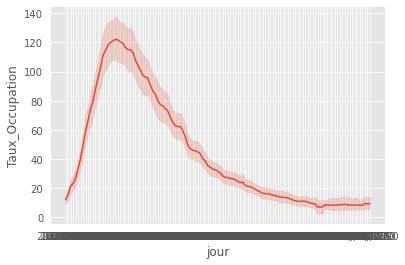

In [18]:
sns.lineplot('jour', 'Taux_Occupation', data = df_filtre)

In [19]:
df_filtre.head()

jour               region nom_dep        CHEF LIEU  Longitude  \
0  2020-03-18  Auverge-Rhône-Alpes     Ain  Bourg-en-Bresse    5.21667   
1  2020-03-19  Auverge-Rhône-Alpes     Ain  Bourg-en-Bresse    5.21667   
2  2020-03-20  Auverge-Rhône-Alpes     Ain  Bourg-en-Bresse    5.21667   
3  2020-03-21  Auverge-Rhône-Alpes     Ain  Bourg-en-Bresse    5.21667   
4  2020-03-22  Auverge-Rhône-Alpes     Ain  Bourg-en-Bresse    5.21667   

   Latitude code_dep  hosp  rea  chu_2019  autre_2019  nbre_lit Cadre_REA  \
0      46.2       01     2    0         0          22        22      null   
1      46.2       01     2    0         0          22        22      null   
2      46.2       01     2    0         0          22        22      null   
3      46.2       01     4    0         0          22        22      null   
4      46.2       01     8    1         0          22        22      null   

  IDE_REA AS_REA  retour_dom  deces  Taux_Occupation  
0    null   null           1      0             0.00  
1    null   null           1      0             0.00  
2    null   null           1      0             0.00  
3    null   null           1      0             0.00  
4    null   null           2      0             4.55

In [20]:
df_remplirIDE = df_filtre.copy()

In [21]:
import math
# Calcul nombre d'infirmières : 2 infirmières pour 5 lits de réanimation
  
df_remplirIDE['IDE_REA']= df_remplirIDE['rea'].apply(lambda x: math.ceil(x/5)*2 if x >= 2 else 2)
        

In [22]:
# Calcul nombre d'aides-soignants pour 4 lits de réanimation
df_remplirIDE['AS_REA']= df_remplirIDE['rea'].apply(lambda x: math.ceil(x/4) if x >= 4 else 1)

In [23]:
# Calcul nombre de médecins en réanimation
def remplir(x):
    if x <= 1.6:
        x = 1
    elif x < 10:
        x = x/1.6
    elif 10 <= x < 15:
        x = x/2.6
    else:
        x = x/4.3
    return round(x,2)

df_remplirIDE['Cadre_REA']= df_remplirIDE['rea'].apply(lambda x: remplir(x))

In [24]:
#df_remplirIDE['jour'] = pd.to_datetime(df_remplirIDE['jour'].astype(str), format='%Y-%m-%d')
#df['DOB']=pd.to_datetime(df['DOB'].astype(str), format='%m/%d/%Y')

df_remplirIDE['code_dep'].replace({'2A': 20.1, '2B' : 20.2}, inplace = True)
df_remplirIDE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11495 entries, 0 to 11494
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   jour             11495 non-null  object 
 1   region           11495 non-null  object 
 2   nom_dep          11495 non-null  object 
 3   CHEF LIEU        11495 non-null  object 
 4   Longitude        11495 non-null  float64
 5   Latitude         11495 non-null  float64
 6   code_dep         11495 non-null  object 
 7   hosp             11495 non-null  int64  
 8   rea              11495 non-null  int64  
 9   chu_2019         11495 non-null  int64  
 10  autre_2019       11495 non-null  int64  
 11  nbre_lit         11495 non-null  int64  
 12  Cadre_REA        11495 non-null  float64
 13  IDE_REA          11495 non-null  int64  
 14  AS_REA           11495 non-null  int64  
 15  retour_dom       11495 non-null  int64  
 16  deces            11495 non-null  int64  
 17  Taux_Occupat

### Export du dataset nettoyé et enrichi

In [25]:
df_remplirIDE = df_remplirIDE.rename(columns={"CHEF LIEU": "chef_lieu"})

In [26]:
df_remplirIDE

jour               region  nom_dep        chef_lieu  Longitude  \
0      2020-03-18  Auverge-Rhône-Alpes      Ain  Bourg-en-Bresse    5.21667   
1      2020-03-19  Auverge-Rhône-Alpes      Ain  Bourg-en-Bresse    5.21667   
2      2020-03-20  Auverge-Rhône-Alpes      Ain  Bourg-en-Bresse    5.21667   
3      2020-03-21  Auverge-Rhône-Alpes      Ain  Bourg-en-Bresse    5.21667   
4      2020-03-22  Auverge-Rhône-Alpes      Ain  Bourg-en-Bresse    5.21667   
...           ...                  ...      ...              ...        ...   
11490  2020-07-12              Mayotte  Mayotte         Dzaoudzi   45.27050   
11491  2020-07-13              Mayotte  Mayotte         Dzaoudzi   45.27050   
11492  2020-07-14              Mayotte  Mayotte         Dzaoudzi   45.27050   
11493  2020-07-14              Mayotte  Mayotte         Dzaoudzi   45.27050   
11494  2020-07-15              Mayotte  Mayotte         Dzaoudzi   45.27050   

       Latitude code_dep  hosp  rea  chu_2019  autre_2019  nbre_lit  \
0       46.2000       01     2    0         0          22        22   
1       46.2000       01     2    0         0          22        22   
2       46.2000       01     2    0         0          22        22   
3       46.2000       01     4    0         0          22        22   
4       46.2000       01     8    1         0          22        22   
...         ...      ...   ...  ...       ...         ...       ...   
11490  -12.7888      976    13    3         0          10        10   
11491  -12.7888      976    14    2         0          10        10   
11492  -12.7888      976    13    1         0          10        10   
11493  -12.7888      976    13    1         0          10        10   
11494  -12.7888      976    10    2         0          10        10   

       Cadre_REA  IDE_REA  AS_REA  retour_dom  deces  Taux_Occupation  
0           1.00        2       1           1      0             0.00  
1           1.00        2       1           1      0             0.00  
2           1.00        2       1           1      0             0.00  
3           1.00        2       1           1      0             0.00  
4           1.00        2       1           2      0             4.55  
...          ...      ...     ...         ...    ...              ...  
11490       1.88        2       1         391     28            30.00  
11491       1.25        2       1         391     28            20.00  
11492       1.00        2       1         391     28            10.00  
11493       1.00        2       1         391     28            10.00  
11494       1.25        2       1         397     28            20.00  

[11495 rows x 18 columns]

In [27]:
df_remplirIDE.to_csv(r'/home/kde/workShare/projet_covid_19/Livrable/Ressources_Data/Dataset_ML_Rea_Geo.csv', index = False, header=True)

In [28]:
# Test des mise à jour journalière : il suffit de rechercher le data d'hier
df_remplirIDE['jour']=='2020-07-14'

0        False
1        False
2        False
3        False
4        False
         ...  
11490    False
11491    False
11492     True
11493     True
11494    False
Name: jour, Length: 11495, dtype: bool